

---



# <h1 align=center> **Carolina del Valle Garay** </h1>




---








#<font color='blue'>**Análisis Exploratorio de Datos (EDA)**

El Análisis Exploratorio de Datos (EDA) es una etapa crucial en cualquier proyecto de ciencia de datos y machine learning. Con los datos limpios, es posible investigar las relaciones entre las variables de los datasets. Este análisis incluye la identificación de outliers o anomalías, que no necesariamente son errores, y la búsqueda de patrones interesantes que puedan ser útiles en análisis posteriores.

En este proyecto, el EDA permitirá investigar el conjunto de datos de películas para identificar características clave, comprender la distribución y variabilidad de los datos, y obtener información valiosa que contribuirá a la contrucción eficiente del modelo de un sistema de recomendación.

**El ánálisis se realizará según las siguientes consideraciones:**

##<font color='green'>**Calidad de los datos**
Evaluar la calidad de los datos identificando valores faltantes e inconsistencias, permite asegurar que los análisis y modelos basados en esos datos son precisos y confiables.

##<font color='green'>**Relaciones entre Variables**

Examinar las relaciones entre las variables permitirá identificar cuáles son las más relevantes para el modelado. Este paso es fundamental para entender cómo se relacionan las distintas características del dataset y cómo influyen en la variable objetivo.

##<font color='green'>**Detección de Outliers**


Identificar outliers o valores atípicos es un paso esencial en el análisis de datos. Estos valores pueden ofrecer información valiosa o indicar la presencia de datos anómalos que podrían afectar el rendimiento de los modelos predictivos.

##<font color='green'>**Identificación de Patrones**
La identificación de patrones en los datos puede revelar insights significativos que valgan la pena explorar en análisis posteriores. Estos patrones pueden informar decisiones estratégicas y mejorar la precisión de los modelos predictivos.

Las nubes de palabras, por ejemplo, ayudan a visualizar la frecuencia de palabras en los títulos de las películas. Esta técnica puede ser muy útil para identificar tendencias y patrones comunes, lo que puede contribuir al desarrollo de un sistema de recomendación más efectivo.











In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from wordcloud import WordCloud, STOPWORDS
import missingno as msno
from collections import Counter

In [2]:
!gdown https://drive.google.com/file/d/17GdfOWQhKz3vH2wBDVdw-k_1_TBh6o8U/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=17GdfOWQhKz3vH2wBDVdw-k_1_TBh6o8U
To: /content/movies_final.parquet
100% 20.6M/20.6M [00:00<00:00, 37.6MB/s]


##Ingesta de datos obtenidos del ETL

In [3]:
df1 = pd.read_parquet('/content/movies_final.parquet')
pd.options.display.float_format = "{:.3f}".format

##<font color='green'>**Calidad de los datos**

###Inspección de los datos

In [4]:
df1[:3]

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,vote_count,name_coll,name_gen,production_companies,production_countries,languages,return,release_year,actors,director
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.947,1995-10-30,373554033.000,81.000,Released,None,...,5415.000,Toy Story Collection,"Animation,Comedy,Family",Pixar Animation Studios,United States of America,English,12.452,1995,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.016,1995-12-15,262797249.000,104.000,Released,Roll the dice and unleash the excitement!,...,2413.000,None,"Adventure,Fantasy,Family","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,"English, Français",4.043,1995,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,0,15602,en,A family wedding reignites the ancient feud be...,11.713,1995-12-22,0.000,101.000,Released,Still Yelling. Still Fighting. Still Ready for...,...,92.000,Grumpy Old Men Collection,"Romance,Comedy","Warner Bros., Lancaster Gate",United States of America,English,0.000,1995,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch


In [5]:
df1['actors'][:3]

,actors
0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney, Wallace Shawn, John Ratzenberger, Annie Potts, John Morris, Erik von Detten, Laurie Metcalf, R. Lee Ermey, Sarah Freeman, Penn Jillette"
1,"Robin Williams, Jonathan Hyde, Kirsten Dunst, Bradley Pierce, Bonnie Hunt, Bebe Neuwirth, David Alan Grier, Patricia Clarkson, Adam Hann-Byrd, Laura Bell Bundy, James Handy, Gillian Barber, Brandon Obray, Cyrus Thiedeke, Gary Joseph Thorup, Leonard Zola, Lloyd Berry, Malcolm Stewart, Annabel Kershaw, Darryl Henriques, Robyn Driscoll, Peter Bryant, Sarah Gilson, Florica Vlad, June Lion, Brenda Lockmuller"
2,"Walter Matthau, Jack Lemmon, Ann-Margret, Sophia Loren, Daryl Hannah, Burgess Meredith, Kevin Pollak"


In [6]:
df1['name_gen'][:3]

,name_gen
0,"Animation,Comedy,Family"
1,"Adventure,Fantasy,Family"
2,"Romance,Comedy"


###Visualizar valores NaN

In [ ]:
# Reemplazar los strings "nan" con valores np.nan
df1.replace("nan", np.nan, inplace=True)


<Axes: >

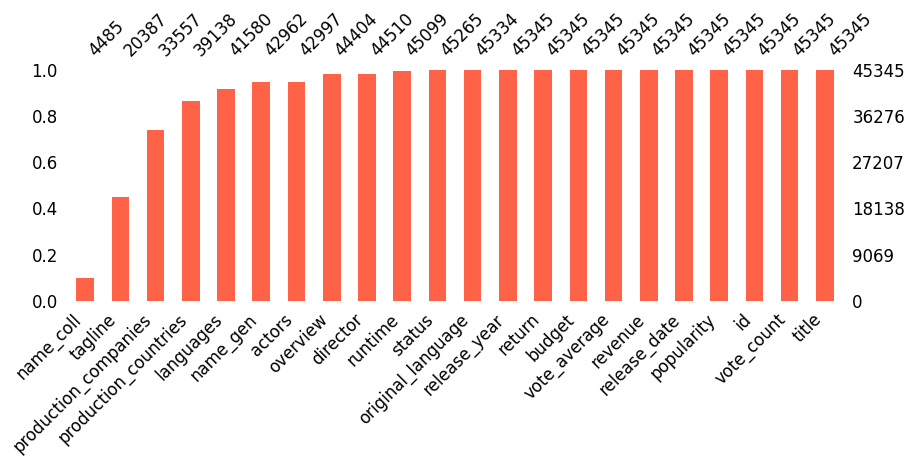

In [ ]:
# Análisis de datos faltantes mediante missingno
# Graficar datos faltantes de las variables. Se observa que hay valores faltantes que representan un porcentaje alto del total
msno.bar(df1,figsize=(10, 3), sort="ascending",fontsize=12, color='tomato')

In [ ]:
# Calcular el porcentaje de datos faltantes en cada columna
df1.isnull().mean() * 100


budget                  0.000
id                      0.000
original_language       0.024
overview                2.075
popularity              0.000
release_date            0.000
revenue                 0.000
runtime                 0.543
status                  0.176
tagline                55.040
title                   0.000
vote_average            0.000
vote_count              0.000
name_coll              90.109
name_gen                5.255
production_companies   25.996
production_countries   13.688
languages               8.303
return                  0.000
release_year            0.000
actors                  5.178
director                1.841
dtype: float64

Se decide eliminar aquellas columnas que tienen un porcentaje mayor al 10% de datos faltantes

In [ ]:
threshold = 10
missing_percentage = df1.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df1c = df1.drop(columns=columns_to_drop)

In [ ]:
df1c.info()

<Axes: >

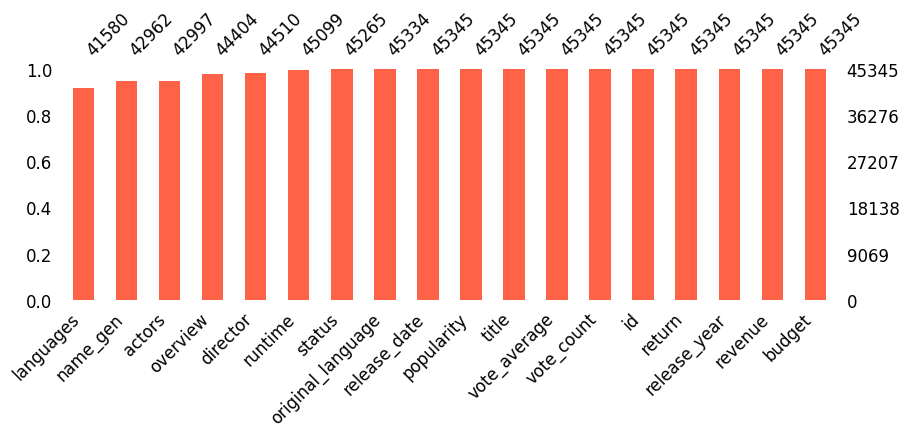

In [ ]:
# Graficar nuevamente los datos faltantes de las variables
msno.bar(df1c,figsize=(10, 3), sort="ascending",fontsize=12, color='tomato')

Se observa que los datos faltantes han disminuído considerablemente

In [ ]:
# Calcular nuevamente el porcentaje de datos faltantes en cada columna
df1c.isnull().mean() * 100

**Decisión sobre los datos faltantes**
Se decidirá imputar o eliminar datos faltantes bluego de realizar la elección de las variables más redundantes para el modelado

##<font color='green'>**Relaciones entre Variables**


##**Análisis multivariado**

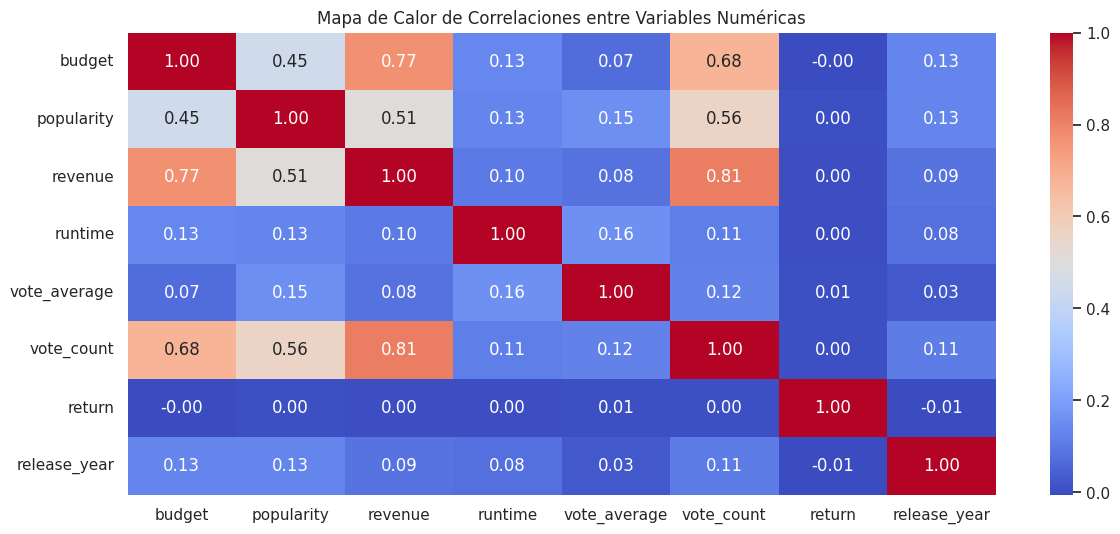

In [ ]:
# Filtrar solo las columnas numéricas relevantes para la correlación
numerical_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return', 'release_year']
df_numerical = df1c[numerical_columns]

# Crear el mapa de calor
plt.figure(figsize=(14, 6))
sns.set(font_scale=1)
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

A continuación, se analiza la correlación de cada par de variables:

1. budget y revenue (0.77): Alta correlación positiva. Indica que a mayor presupuesto, mayor es la recaudación.
2. budget y vote_count (0.68): Alta correlación positiva. Sugiere que películas con mayor presupuesto tienden a recibir más votos.
3. budget y popularity (0.45): Moderada correlación positiva. Las películas con mayor presupuesto tienden a ser más populares.
4. popularity y vote_count (0.56): Moderada correlación positiva. Las películas más populares tienden a tener más votos.
5. revenue y vote_count (0.81): Alta correlación positiva. Indica que películas con mayores ingresos tienden a tener más votos.
6. vote_count y vote_average (0.12): Baja correlación positiva. Los votos y el promedio de votos tienen una relación débilmente positiva.
7. runtime y otras variables: Las correlaciones son bajas (0.13 con budget, 0.10 con revenue y 0.16 con vote_average). El tiempo de duración no tiene una fuerte relación con las otras variables.
8. return y otras variables: Las correlaciones son muy bajas (cerca de 0). El retorno no está fuertemente relacionado con ninguna de las otras variables.
9. release_year y otras variables: Correlaciones bajas, indicando que el año de lanzamiento no tiene una fuerte relación con las otras variables.

**Conclusiones:** Las variables con las correlaciones más fuertes son **budget, revenue y vote_count**.
runtime y return no muestran correlaciones significativas con las demás variables.
release_year tampoco muestra una correlación significativa con las otras variables.
Esto sugiere que el presupuesto es un buen indicador de la **popularidad**, la cantidad de votos y los ingresos de una película. Sin embargo, la duración y el año de lanzamiento no son tan importantes.

##**Variables Categóricas y Numéricas: análisis entre tres variables**
Se estudia la relación entre las variables categóricas 'actors'y 'director' con la variable 'popularity'. Se muestra un top 10 de los actores que protagonizaron más películas y de los directores que dirigieron la mayor cantidad de películas, con sus respectiva popularidad.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos de que no haya valores NaN en las columnas 'actors', 'director' y 'popularity'
df1c = df1c.dropna(subset=['actors', 'director', 'popularity'])

# Extraer el primer actor de la lista en la columna 'actors'
df1c['first_actor'] = df1c['actors'].apply(lambda x: x.split(',')[0] if pd.notna(x) else '')

# Extraer el primer director de la lista en la columna 'director'
df1c['first_director'] = df1c['director'].apply(lambda x: x.split(',')[0] if pd.notna(x) else '')

# Obtener los 10 directores que más películas han dirigido
top_directors = df1c['first_director'].value_counts().head(10)
top_directors_names = top_directors.index.tolist()

# Obtener los 10 actores que más películas han protagonizado
top_actors = df1c['first_actor'].value_counts().head(10)
top_actors_names = top_actors.index.tolist()

# Filtrar el DataFrame para los directores y actores más frecuentes
df_top_directors = df1c[df1c['first_director'].isin(top_directors_names)]
df_top_actors = df1c[df1c['first_actor'].isin(top_actors_names)]

# Calcular la popularidad promedio para los directores
avg_popularity_directors = df_top_directors.groupby('first_director')['popularity'].mean().reindex(top_directors_names).reset_index()

# Calcular la popularidad promedio para los actores
avg_popularity_actors = df_top_actors.groupby('first_actor')['popularity'].mean().reindex(top_actors_names).reset_index()

# Calcular la popularidad total para cada director
director_popularity = df1c.groupby('first_director')['popularity'].mean().reset_index()
director_popularity = director_popularity.sort_values(by='popularity', ascending=False)
top_10_directors_popularity = director_popularity.head(10)

# Calcular la popularidad total para cada actor
actor_popularity = df1c.groupby('first_actor')['popularity'].mean().reset_index()
actor_popularity = actor_popularity.sort_values(by='popularity', ascending=False)
top_10_actors_popularity = actor_popularity.head(10)




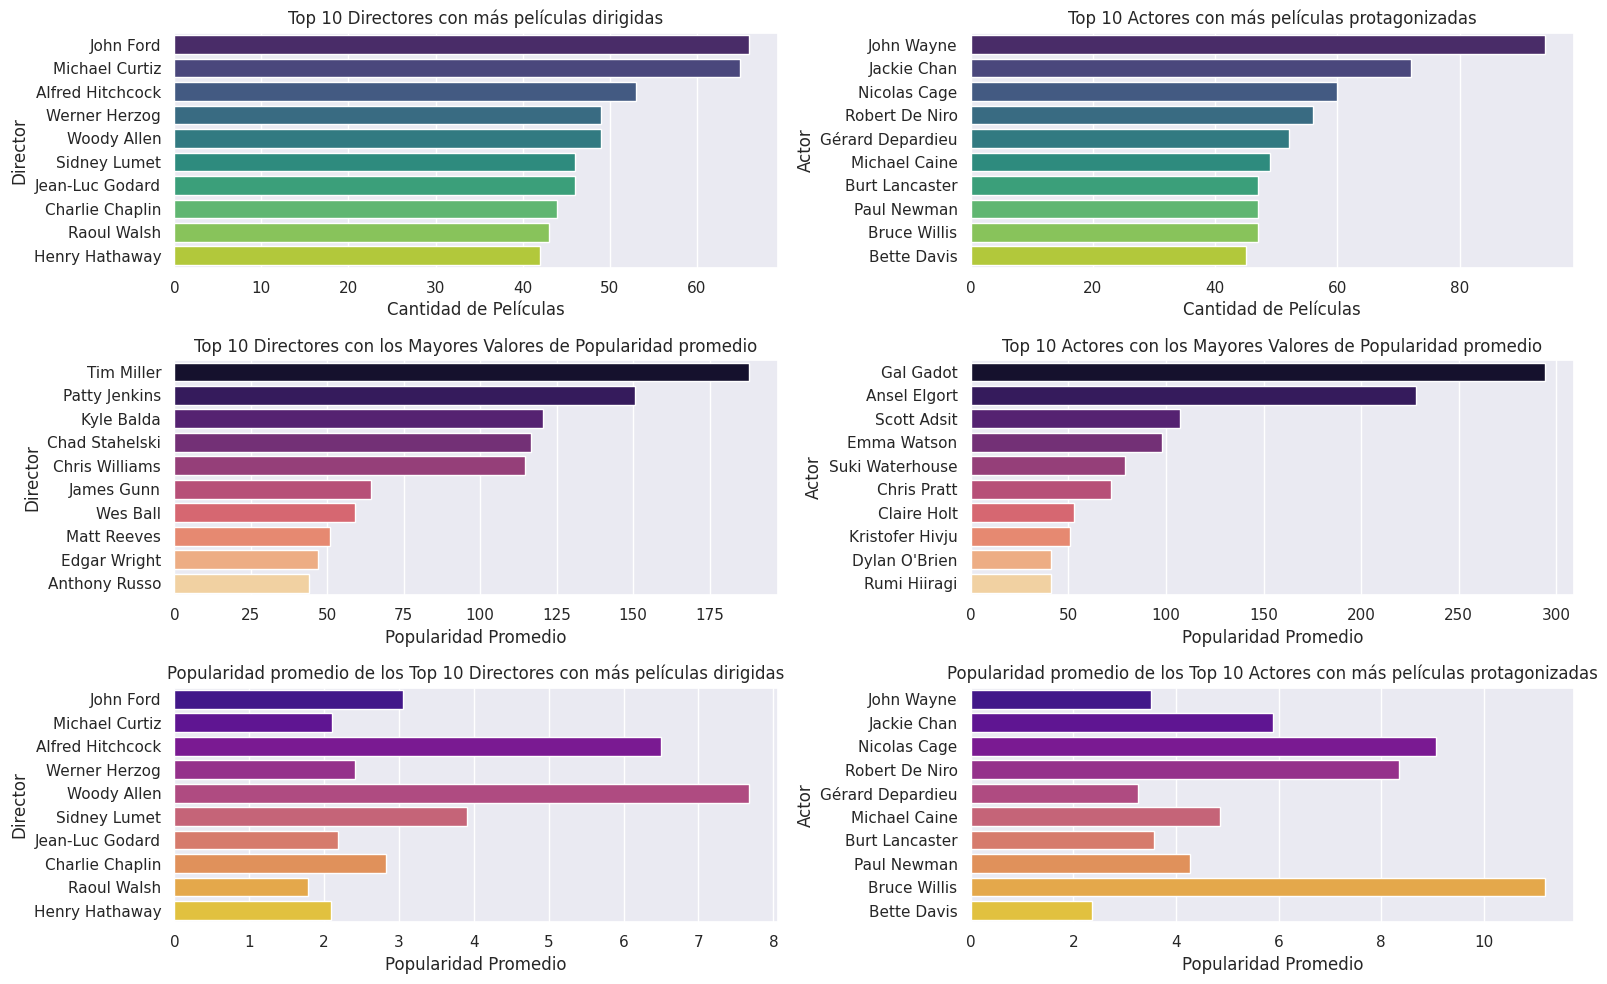

In [ ]:
# Graficar los resultados
fig, axes = plt.subplots(3, 2, figsize=(16, 10))

# Gráfico de barras para directores más prolíficos
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Directores con más películas dirigidas')
axes[0, 0].set_xlabel('Cantidad de Películas')
axes[0, 0].set_ylabel('Director')

# Gráfico de barras para la popularidad promedio de los directores más prolíficos
sns.barplot(x='popularity', y='first_director', data=avg_popularity_directors, palette='plasma', ax=axes[2, 0])
axes[2, 0].set_title('Popularidad promedio de los Top 10 Directores con más películas dirigidas')
axes[2, 0].set_xlabel('Popularidad Promedio')
axes[2, 0].set_ylabel('Director')


# Gráfico de barras para la popularidad promedio de los actores más prolíficos
sns.barplot(x='popularity', y='first_actor', data=avg_popularity_actors, palette='plasma', ax=axes[2, 1])
axes[2, 1].set_title('Popularidad promedio de los Top 10 Actores con más películas protagonizadas')
axes[2, 1].set_xlabel('Popularidad Promedio')
axes[2, 1].set_ylabel('Actor')



# Gráfico de barras para los actores con mayores valores de popularidad
sns.barplot(x='popularity', y='first_actor', data=top_10_actors_popularity, palette='magma', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Actores con los Mayores Valores de Popularidad promedio')
axes[1, 1].set_xlabel('Popularidad Promedio')
axes[1, 1].set_ylabel('Actor')



# Gráfico de barras para actores más prolíficos
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Actores con más películas protagonizadas')
axes[0, 1].set_xlabel('Cantidad de Películas')
axes[0, 1].set_ylabel('Actor')




# Gráfico de barras para los directores con mayores valores de popularidad
sns.barplot(x='popularity', y='first_director', data=top_10_directors_popularity, palette='magma', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Directores con los Mayores Valores de Popularidad promedio')
axes[1, 0].set_xlabel('Popularidad Promedio')
axes[1, 0].set_ylabel('Director')

plt.tight_layout()
plt.show()

###**Conclusiones y Observaciones de la gráfica anterior**
1. Los directores prolíficos, no necesariamente tienen las películas con los mayores valores de popularidad promedio.
Popularidad promedio de los directores más prolíficos:

2. La popularidad de un director no siempre está correlacionada con la cantidad de películas dirigidas, sino más con la calidad o el impacto de sus películas.


3. Los directores que no son tan prolíficos, dirigen películas que tienden a ser muy populares.


4. Los actores con más películas protagonizadas no tienen la popularidad más alta.


5. Hay actores que tienen una popularidad promedio relativamente alta entre los actores más prolíficos. Esto puede indicar que actores con carreras largas y diversas aún pueden mantener una alta popularidad.


6. Actores jóvenes o con menos películas pueden tener altos valores de popularidad si las películas en las que participan son éxitos de taquilla.


**Implicaciones para el Sistema de Recomendación**

- Las recomendaciones no deben basarse únicamente en la cantidad de películas dirigidas o protagonizadas, sino también en la popularidad promedio de las películas.
- Considerar tanto directores y actores prolíficos como aquellos con altos valores de popularidad promedio.

- Actores y directores con altos valores de popularidad promedio pueden ser recomendados para usuarios interesados en películas populares o de alta calidad.

###**Conclusión**: Incluir tanto películas de directores y actores prolíficos como de aquellos con alta popularidad promedio para satisfacer una variedad de preferencias.





<font color='red'>**Se generarán dos variables nuevas con los primeros actores y directores de cada película. Eso se decide por los resultados de la gráfica anterior y por las limitaciones en cuanto a la memoria requerida por el sitio (render.com) en donde se desplegará el proyecto**

##<font color='green'>**Detección de Outliers**

No se hará análisis de outliers debido a que se decide utilizar variables que respondan al modelo que reconozca texto, es decir variables de tipo string.

##<font color='green'>**Identificación de Patrones**

Se analizarán distintas variables con el fin de mostrar alguna tendencia o patrón

##**Análisis Univariable**



**Atributo 'title' que corresponde a los títulos de las películas**

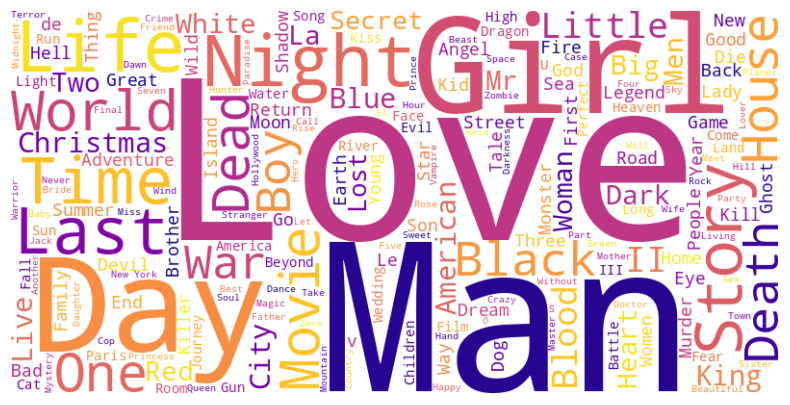

In [ ]:
# Concatenar todos los géneros en una sola cadena
all_title = ' '.join(df1['title'].dropna().str.replace(',', ' '))

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(all_title)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###**Conclusiones y Observaciones de la nube de palabras correspondiente al atributo 'title'**

Temas recurrentes:

- Relaciones y emociones: Palabras como "Love" y "Life" sugieren un enfoque en las relaciones humanas y las emociones.

- Personajes: Palabras como "Man", "Girl", "Boy", "Woman", "Mr" indican que los títulos de las películas a menudo se centran en personas específicas.

- Temporalidad: Palabras como "Day", "Night", "Time", "Last" muestran un interés en la temporalidad y momentos significativos.

- Aventuras y escenarios: "World", "Earth", "City", "Island" sugieren una variedad de escenarios amplios y aventuras.

- Temas oscuros: Palabras como "Dead", "Dark", "Death" indican un interés en temas de misterio, terror y muerte.


**Atributo 'name_gen' que caracteriza a los distintos géneros**

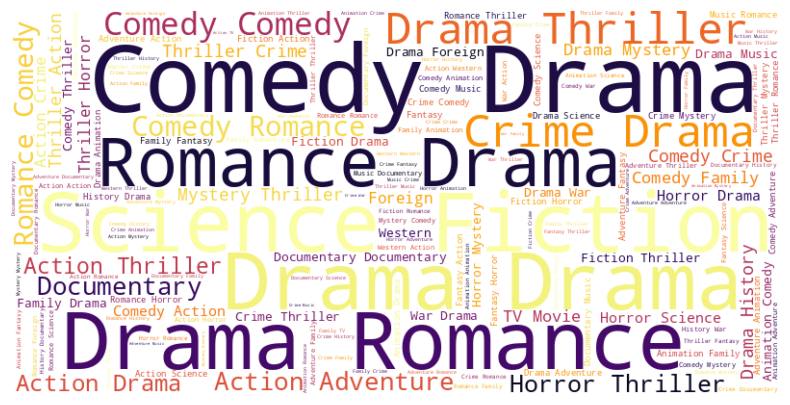

In [ ]:
# Concatenar todos los géneros en una sola cadena
all_genres = ' '.join(df1['name_gen'].dropna().str.replace(',', ' '))

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(all_genres)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###**Conclusiones y Observaciones de la nube de palabras correspondiente al atributo 'name_gen'**

Temas recurrentes:

- Géneros principales: La nube muestra que los géneros más comunes son drama, comedia y romance.

- Géneros secundarios: Ciencia ficción, thriller, acción, crimen, documental y horror son también importantes, pero menos frecuentes que los principales.

- Combinaciones de géneros: Es evidente que hay muchas películas que combinan géneros, como "Action Thriller", "Comedy Drama", "Romance Thriller", y "Science Fiction".

**Atributo 'tagline' que se asocia a slogan de las Películas.**

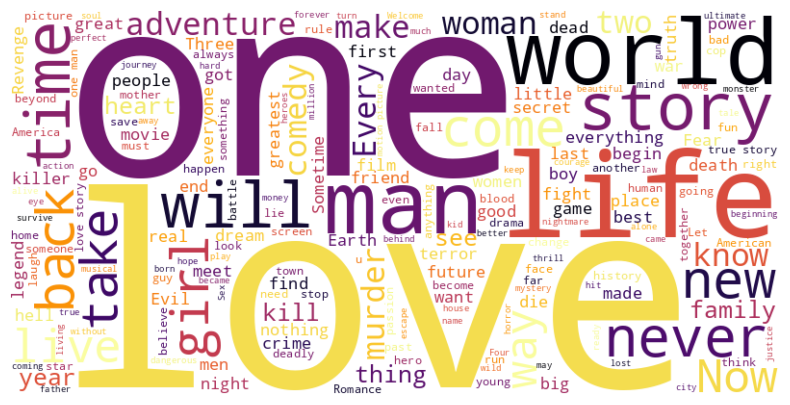

In [ ]:
# Concatenar todos los géneros en una sola cadena
all_tagline = ' '.join(df1['tagline'].dropna().str.replace(',', ' '))

# Crear una instancia de WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(all_tagline)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###**Conclusiones y Observaciones de la nube de palabras correspondiente al atributo 'tagline'**

Temas recurrentes:

- Amor y vida: Las palabras "love" y "life" indican que muchos slogans se centran en el amor y la existencia, temas universales y emotivos.
- Individualidad y singularidad: "One" y "man" sugieren que muchas películas se enfocan en individuos específicos y sus experiencias únicas.
- Mundo y tiempo: "World" y "time" apuntan a temas que trascienden lo personal para abordar cuestiones más amplias y temporales.
- Narrativa: La prominencia de "story" indica que la forma en que se cuenta la historia es un aspecto crucial en las películas.

#**Conclusión Final**

Según lo analizado se decide por los siguientes atributos candidatos a ser utilizados en el modelo:
- actors
- director
- overview
-  taglines
-  genres
-  title